# Clustering of the neighborhoods in Toronto

### 1. Gathering Data

In [1]:
# first import all useful libraries
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

In [3]:
# get data from wikipedia and create a soup object
source = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(source.text, 'lxml')

### 2. Creating a Dataframe and Cleaning the Data

In [4]:
#use our soup object to extract wikitable data from html page and store it into a list.
data = []
columns = []
table = soup.find(class_='wikitable')
for index, tr in enumerate(table.find_all('tr')):
    section = []
    for td in tr.find_all(['th','td']):
        section.append(td.text.rstrip())
    
    #set first row of the list to be its header.
    if (index == 0):
        columns = section
    else:
        data.append(section)

#convert list into pd DataFrame.
ca_df = pd.DataFrame(data = data,columns = columns)
ca_df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [5]:
#create a new dataframe which ignores Neighbourhoods that are labeled as Not assigned.
df1=ca_df
ca_df1 = df1.loc[df1['Neighbourhood']== 'Not assigned']

#replace Not assigned Neighbourhoods column values with values from Borough.
for i in ca_df1.index:
    ca_df1.at[i, 'Neighbourhood'] = ca_df1.at[i, 'Borough']

#replace rows in original DataFrame.
df1.loc[ca_df1.index] = ca_df1

#delete rows with Borough that are Not assigned.
ca_df = df1[df1.Borough != 'Not assigned']

#group by postcode and Borough, keeping all the Neighbourhoods.
ca_df=ca_df.groupby(['Postcode','Borough'])['Neighbourhood'].apply(lambda x: ','.join(x.astype(str))).reset_index()

#remove duplicates.
ca_df = ca_df.drop_duplicates()

#print our DataFrame.
ca_df

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park"
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge"
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff,Cliffside West"


### 3. Print the number of rows of the Dataframe

In [6]:
ca_df.shape

(103, 3)

### 4. Adding Geospatical Data

In [7]:
!conda install geopandas

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    freexl-1.0.5               |       h14c3975_0          44 KB
    giflib-5.1.4               |       h14c3975_1          78 KB
    libspatialindex-1.8.5      |       h20b78c2_2         666 KB
    libkml-1.3.0               |       h590aaf7_4         633 KB
    poppler-0.65.0             |       h581218d_1         1.6 MB
    fiona-1.8.4                |   py36hc38cc03_0         1.0 MB
    descartes-1.1.0            |             py_3           9 KB
    munch-2.3.2                |           py36_0          13 KB
    xerces-c-3.2.2             |       h780794e_0         3.2 MB
    poppler-data-0.4.9         |                0         3.5 MB
    gdal-2.3.3                 |   py36hbb2a789_0         1.3 MB


In [8]:
#read and load geographical locations of Toronto postcodes.
pc_geo = pd.read_csv('https://cocl.us/Geospatial_data', header=0)
pc_geo.rename(columns={'Postal Code':'Postcode'}, inplace=True)

#merge postcodes list within Borough & Neigbourhood DataFrame.
pc_m_geo=pd.merge(ca_df,pc_geo, on='Postcode')

#print our updated DataFrame.
pc_m_geo

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848


### 5. Exploration through Visualization

/opt/conda/envs/Python36/lib/python3.6/site-packages/geopandas/plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


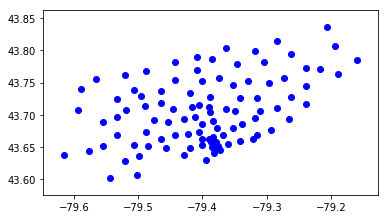

In [9]:
# import libraries necessary for plotting.
%matplotlib inline
import io
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# reorder column names of our DataFrame.
pc_m_geo = pc_m_geo[['Postcode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude']]
pc_m_geo['Coordinates'] = list(zip(pc_m_geo.Longitude, pc_m_geo.Latitude))
pc_m_geo['Coordinates'] = pc_m_geo['Coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(pc_m_geo, geometry='Coordinates')
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
ax = cities[cities.name == "Toronto"].plot(
    color='white', edgecolor='black')

#plot and show our map.
gdf.plot(ax=ax, color='blue')
plt.show()